In [1]:
import torch
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from matplotlib import pyplot as plt

from Models import U_net, PlottingCallback
from Simulation import DataGenerator
import warnings
warnings.filterwarnings("ignore") 

c:\ProgramData\Anaconda3\envs\dl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Dataset prep
dt = DataGenerator('train')
dv = DataGenerator('valid')

train_loader = torch.utils.data.DataLoader(dt, shuffle = True)
valid_loader = torch.utils.data.DataLoader(dv, shuffle = True)

# Model and Train
model = U_net(img_size=[dt.img_size, dt.img_size], learning_rate=1e-3)
trainer = pl.Trainer(gpus=-1, fast_dev_run = False, progress_bar_refresh_rate=20, callbacks=[PlottingCallback(dataloader=train_loader)])
trainer.fit(model, train_loader, valid_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type       | Params | In sizes                           | Out sizes                         
-------------------------------------------------------------------------------------------------------------------------
0 | enc_1           | Encoder    | 7.3 K  | [1, 1, 200, 200]                   | [[1, 9, 92, 92], [1, 9, 92, 92]]  
1 | enc_2           | Encoder    | 12.2 K | [1, 9, 92, 92]                     | [[1, 18, 42, 42], [1, 18, 42, 42]]
2 | dec_2           | Decoder    | 6.1 K  | [[1, 18, 42, 42], [1, 18, 42, 42]] | [1, 9, 92, 92]                    
3 | dec_1           | Decoder    | 814    | [[1, 9, 92, 92], [1, 9, 92, 92]]   | [1, 1, 200, 200]                  
4 | smoother        | Sequential | 58     | ?                                  | ?                            

Epoch 39:  36%|███▋      | 40/110 [00:00<00:00, 80.54it/s, loss=0.0178, v_num=0] 

Epoch 39:  36%|███▋      | 40/110 [00:18<00:32,  2.13it/s, loss=0.0178, v_num=0]

In [ ]:
dt = DataGenerator('train', size = 100)
dv = DataGenerator('valid', size=10)
dt.generate()
dv.generate()
dt.show_example()

In [4]:
image, label = next(iter(train_loader))

output = model.forward(image.cuda())
output = output[0,0].cpu().detach().numpy()

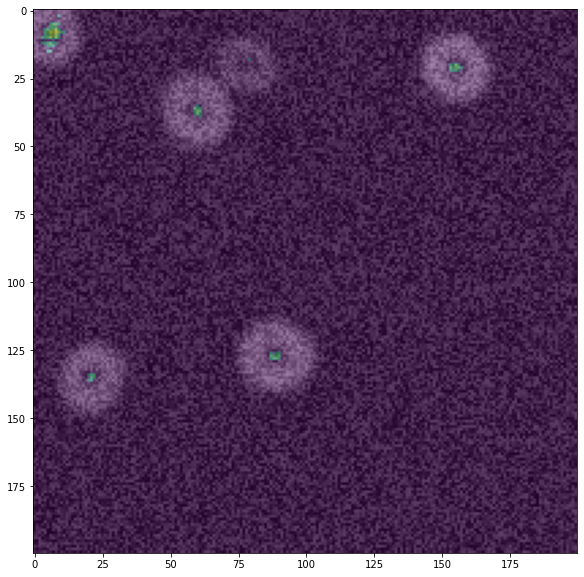

In [5]:
plt.figure(figsize=(10,10))
mask = output.copy()
mask[output < 0.9] = 0
plt.imshow(image[0,0].cpu().detach().numpy(), cmap='gray')
plt.imshow(mask, alpha=0.5)